In [1]:
import numpy as np
import scipy as sp
import scipy.signal as sg
import scipy.fft as fft
import matplotlib.pyplot as plt


from ipywidgets import interact

In [2]:
max_ntap = 2 ** 12
wins = ["boxcar", "triang", "blackman", "hamming", "hann", 
        "bartlett", "flattop", "parzen", "bohman", "blackmanharris",
        "nuttall", "barthann"
       ]
        #, "kaiser", "gaussian", "general_gaussian",
        #"slepian", "chebwin", "exponential", "tukey" ]

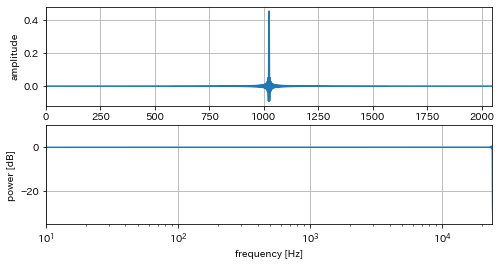

In [3]:
# 文字列はテキストボックス、タプルはスライダー、
# 文字列タプルはセレクトボックス、真偽値はチェックボックスになる
@interact(ntap=(1, max_ntap), nfft=(1, max_ntap), min_dB=(-80.0, 10.0),
          fs=(0.0, 96000.0), cutoff_hz=(10.0, 48000.0), window=wins,
          xlabel="point", ylabel="amplitude")
def firwin_plot(ntap, nfft, fs, cutoff_hz, min_dB, window, xlabel, ylabel):
    """FIR filter designer"""
    cutoff = cutoff_hz / fs
    b = sg.firwin(ntap, cutoff, window=window)
    worN = nfft // 2
    w, h = sg.freqz(b, [1], worN=worN)
    f = (fs / np.pi) * w

    # plot
    fig, axes = plt.subplots(2, 1, figsize=(8,4));
    axes[0].plot(b)
    axes[0].grid()
    axes[0].set_xlim([0, ntap])
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    axes[1].semilogx(f, 20.0*np.log10(np.abs(h) + 1.e-12))
    axes[1].set_xlim([10.0, fs/2])
    axes[1].set_ylim([min_dB, 10.0])
    axes[1].set_xlabel("frequency [Hz]")
    axes[1].set_ylabel("power [dB]")
    axes[1].grid()
    plt.show();